In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
from sklearn.model_selection import train_test_split
features = df[df.columns[0:len(df.columns)-1]]
labels = df[df.columns[len(df.columns)-1]]
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
    test_size=0.30)
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
382923,3123,162,17,1138,205,3151,234,242,133,1584,...,0,0,1,0,0,0,0,0,0,0
425651,3036,151,15,170,25,1639,238,239,126,2347,...,0,0,1,0,0,0,0,0,0,0
326004,2763,84,9,134,19,499,233,225,125,2629,...,1,0,0,0,0,0,0,0,0,0
231630,3232,6,13,67,5,2285,204,215,147,2620,...,0,0,0,0,0,0,0,0,0,0
258114,2809,315,28,633,54,1018,136,205,203,1293,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
X_train_std

array([[ 0.58470898,  0.05681228,  0.38622523, ..., -0.16605707,
        -0.15615291, -0.12399137],
       [ 0.27392297, -0.04152189,  0.11905496, ..., -0.16605707,
        -0.15615291, -0.12399137],
       [-0.70130209, -0.64046634, -0.68245586, ..., -0.16605707,
        -0.15615291, -0.12399137],
       ..., 
       [-1.11925568, -0.5063743 , -0.54887073, ..., -0.16605707,
        -0.15615291, -0.12399137],
       [ 0.59899799, -0.22031127,  0.38622523, ..., -0.16605707,
        -0.15615291, -0.12399137],
       [ 0.62043151, -0.02364295, -0.01453018, ..., -0.16605707,
        -0.15615291, -0.12399137]])

In [5]:
from sklearn.ensemble import BaggingClassifier
import time
time_start = time.time()
bc = BaggingClassifier(max_features=.5, max_samples=.5)
bc.fit(X_train_std, Y_train)
print("--- %s seconds ---" % (time.time() - time_start))

--- 17.803240060806274 seconds ---


In [6]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = bc.predict(X_test_std)
print(confusion_matrix(Y_test, y_pred))

[[59363  4198     1     0    12     8   105]
 [ 4791 79599   223     0    96   124    15]
 [    3   392  9946    52    10   252     0]
 [    0     0   166   649     0    23     0]
 [   86   916    25     0  1817     4     0]
 [   19   411   842    26     4  3998     0]
 [  536    51     0     0     0     0  5541]]


In [7]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          1       0.92      0.93      0.92     63687
          2       0.93      0.94      0.93     84848
          3       0.89      0.93      0.91     10655
          4       0.89      0.77      0.83       838
          5       0.94      0.64      0.76      2848
          6       0.91      0.75      0.82      5300
          7       0.98      0.90      0.94      6128

avg / total       0.92      0.92      0.92    174304



In [8]:
print(bc.score(X_test_std, Y_test))

0.923174453828


In [9]:
import seaborn as sns
%matplotlib inline

In [10]:
corr = df.corr()

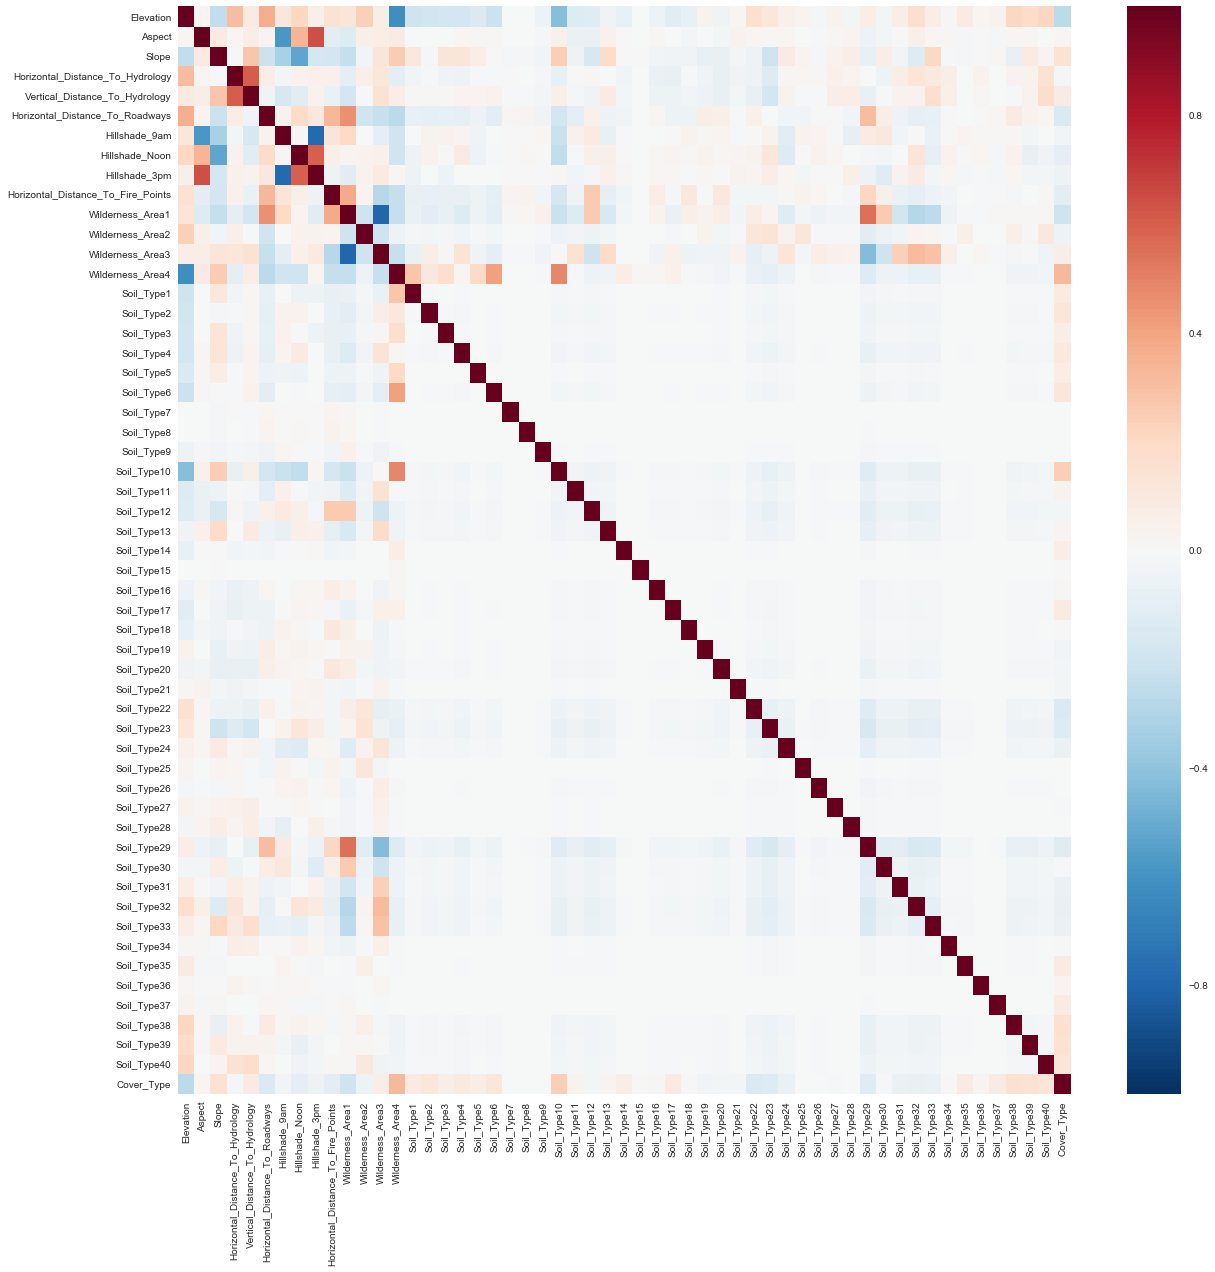

In [11]:
plt.figure(figsize= (20,20))
sns.heatmap(data = corr)
plt.show()

In [12]:
corr = corr.abs()
np.fill_diagonal(corr.values, 0)
s = corr.unstack()
s = s.sort_values(kind = 'quicksort')


In [13]:
s[-20:]

Wilderness_Area4                  Soil_Type10                         0.485031
Soil_Type10                       Wilderness_Area4                    0.485031
Hillshade_Noon                    Slope                               0.526911
Slope                             Hillshade_Noon                      0.526911
Soil_Type29                       Wilderness_Area1                    0.550549
Wilderness_Area1                  Soil_Type29                         0.550549
Aspect                            Hillshade_9am                       0.579273
Hillshade_9am                     Aspect                              0.579273
Hillshade_Noon                    Hillshade_3pm                       0.594274
Hillshade_3pm                     Hillshade_Noon                      0.594274
Vertical_Distance_To_Hydrology    Horizontal_Distance_To_Hydrology    0.606236
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology      0.606236
Elevation                         Wilderness_Area4  

In [14]:
df_nocorr = df.drop(['Hillshade_3pm', 'Horizontal_Distance_To_Hydrology','Wilderness_Area1'], axis = 1)
features = df_nocorr[df_nocorr.columns[0:len(df_nocorr.columns)-1]]
labels = df_nocorr[df_nocorr.columns[len(df_nocorr.columns)-1]]
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
    test_size=0.30)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
X_train_std

array([[-0.16151381, -1.07706884,  0.65420525, ..., -0.16661907,
        -0.15596279, -0.123469  ],
       [ 0.48797343, -0.14813843, -0.01428842, ..., -0.16661907,
        -0.15596279, -0.123469  ],
       [-0.08300436,  0.47710318,  1.05530145, ..., -0.16661907,
        -0.15596279, -0.123469  ],
       ..., 
       [-0.75033465, -0.42503115,  1.59009638, ..., -0.16661907,
        -0.15596279, -0.123469  ],
       [ 0.86981482,  1.19166503,  0.38680778, ...,  6.00171406,
        -0.15596279, -0.123469  ],
       [ 0.45942454,  1.47748977,  0.25310905, ..., -0.16661907,
        -0.15596279, -0.123469  ]])

In [15]:
time_start = time.time()
bagging = BaggingClassifier()
bagging.fit(X_train_std, Y_train)
print("--- %s seconds ---" % (time.time() - time_start))

--- 45.15240550041199 seconds ---


In [16]:
y_pred = bagging.predict(X_test_std)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          1       0.95      0.96      0.96     63410
          2       0.96      0.96      0.96     85146
          3       0.94      0.96      0.95     10689
          4       0.90      0.84      0.87       828
          5       0.91      0.80      0.85      2890
          6       0.93      0.90      0.92      5144
          7       0.97      0.94      0.95      6197

avg / total       0.96      0.96      0.96    174304



In [17]:
print(bagging.score(X_test_std, Y_test))

0.956036579769


In [18]:
conf_matrix = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix)

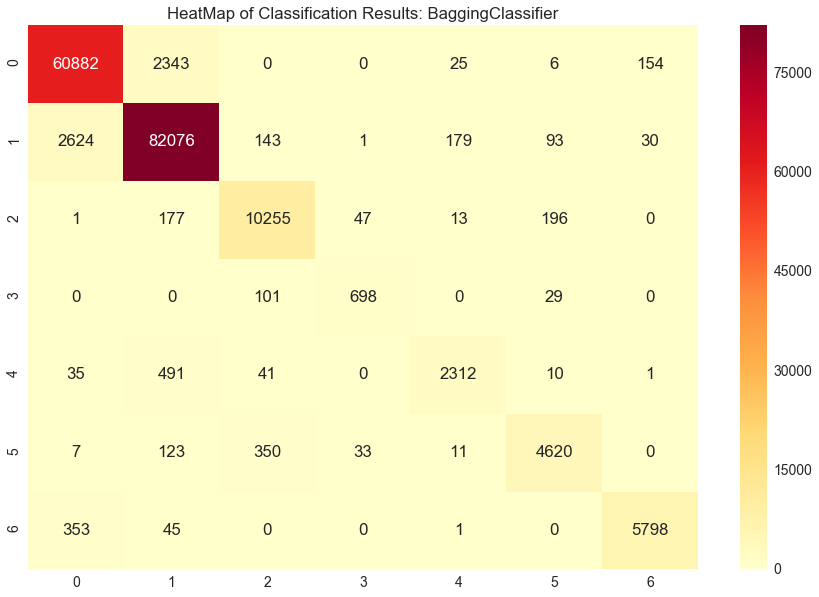

In [20]:
plt.figure(figsize=(15,10))
plt.title('HeatMap of Classification Results: BaggingClassifier')
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot= True, fmt = 'g', cmap = 'YlOrRd')
plt.savefig('bc.jpeg')